In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

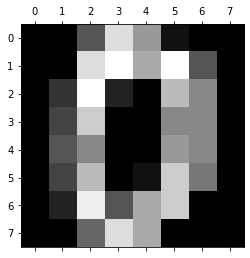

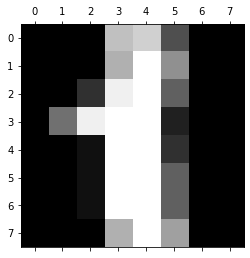

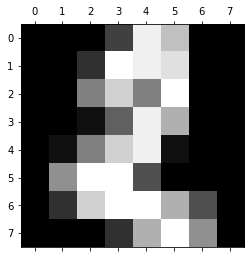

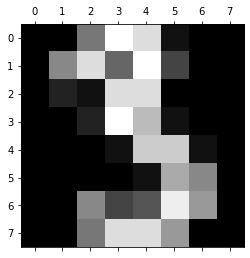

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
df=pd.DataFrame(digits.data)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df['Target']=digits.target

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(['Target'], axis='columns'), df.Target, test_size=0.2)

In [14]:
len(X_train)

1437

In [15]:
len(X_test)

360

In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.975

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.975

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.975

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1100)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9722222222222222

In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1500)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.975

In [26]:
y_predicted=model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

In [29]:
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  1,  0,  1,  1,  0,  1, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 36]])

Text(69.0, 0.5, 'Truth')

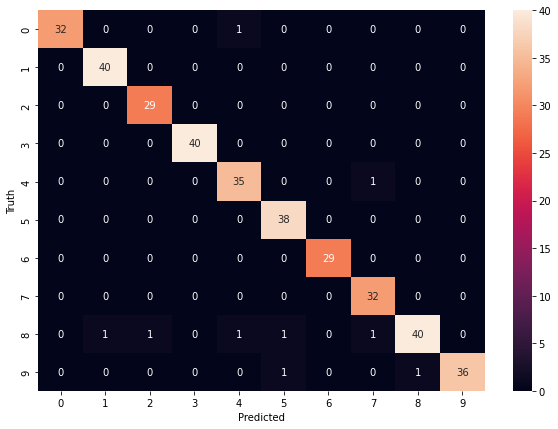

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')